In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [3]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(URL)
		

In [4]:
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


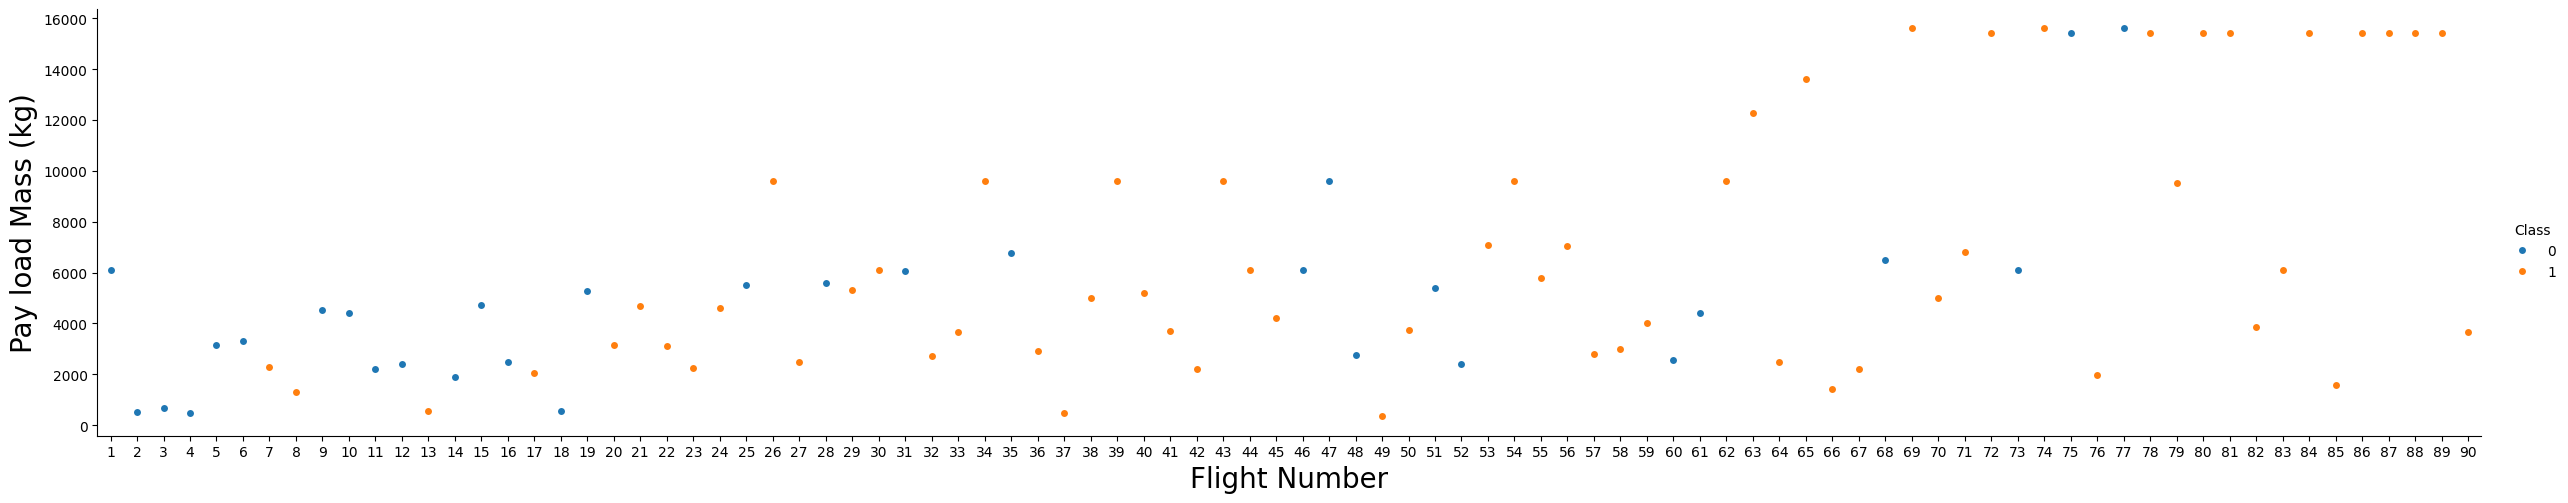

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

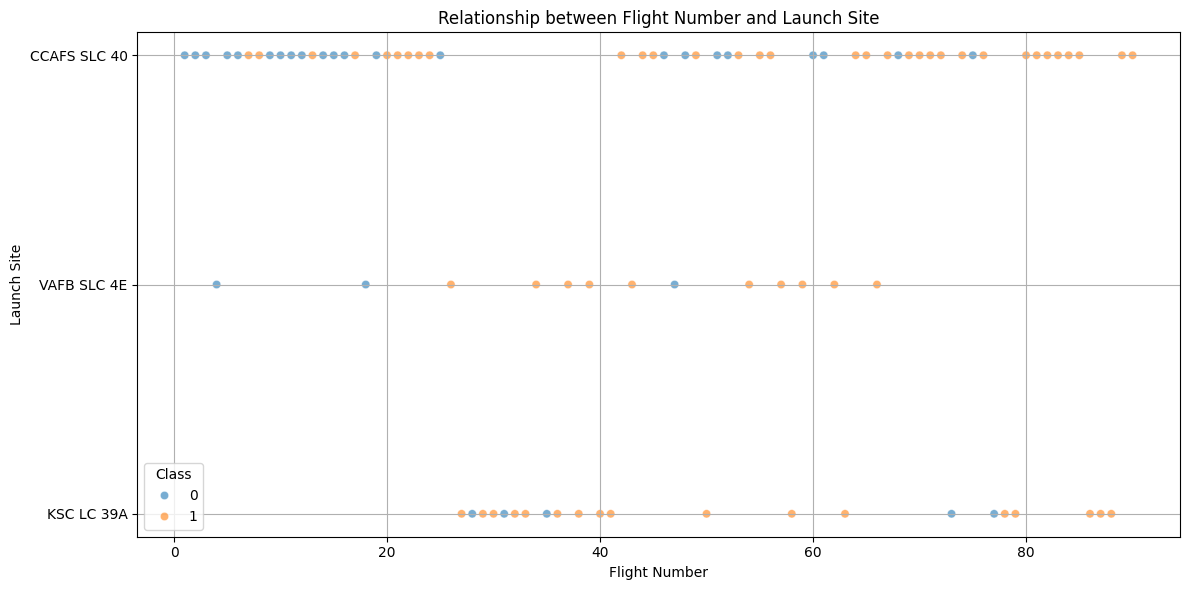

In [6]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='FlightNumber', y='LaunchSite', hue='Class', data=df, alpha=0.6)
plt.title('Relationship between Flight Number and Launch Site')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.grid(True)
plt.tight_layout()
plt.show()


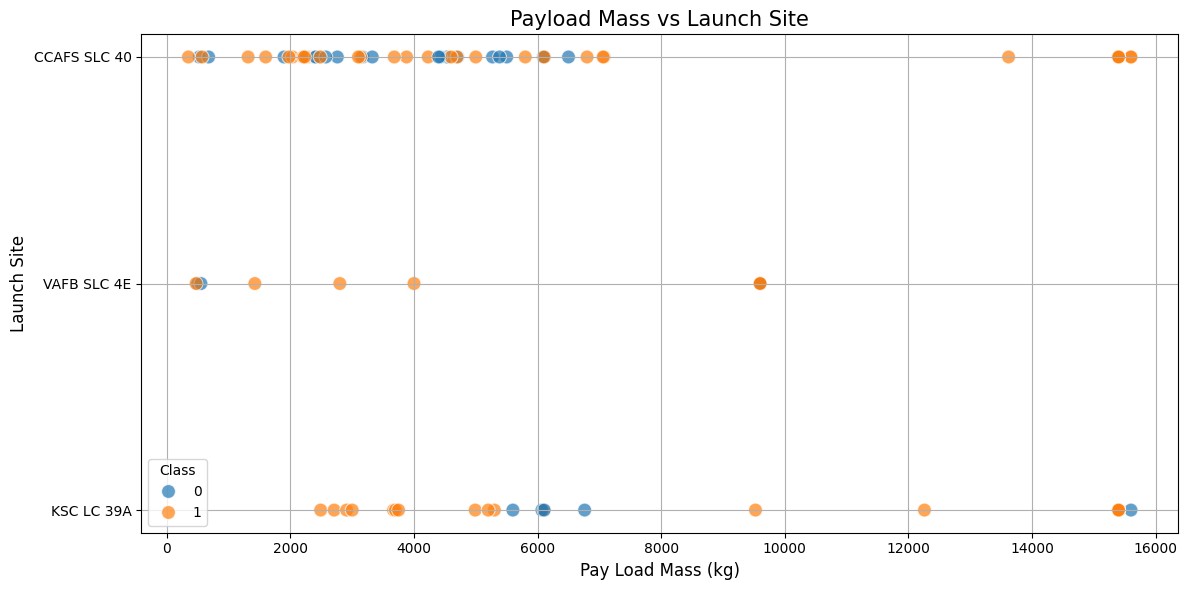

In [7]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PayloadMass', y='LaunchSite', hue='Class', data=df, alpha=0.7, s=100)
plt.title('Payload Mass vs Launch Site', fontsize=15)
plt.xlabel('Pay Load Mass (kg)', fontsize=12)
plt.ylabel('Launch Site', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\moroi\AppData\Local\Temp\ipykernel_22968\605587533.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orbit_success_rate, x='Orbit', y='Class', palette='viridis')


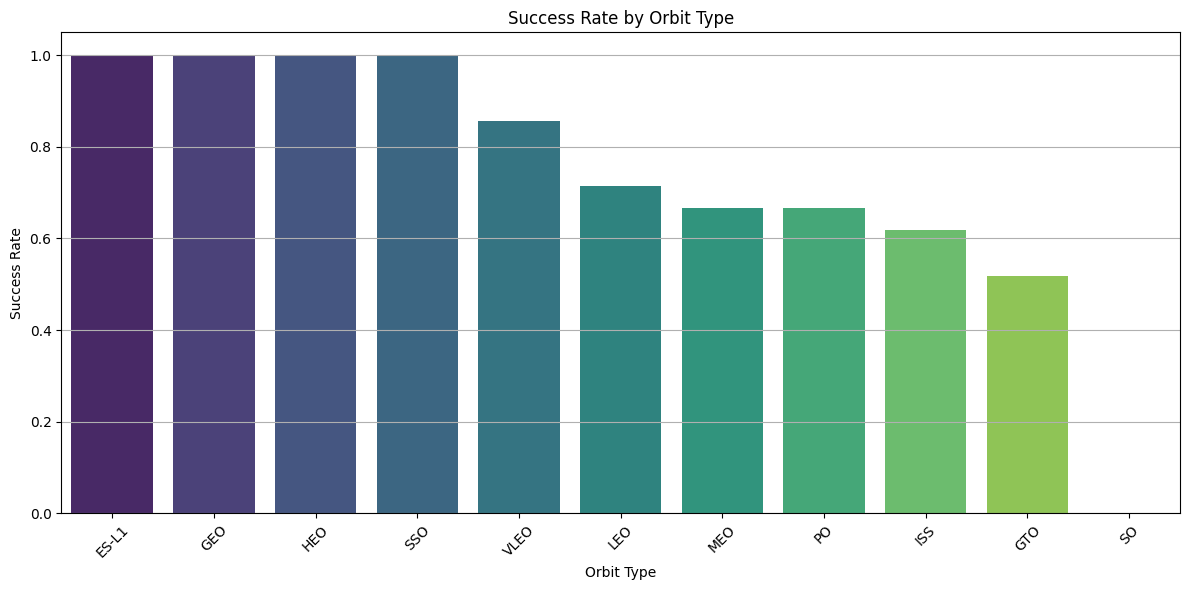

In [8]:
# Calculate success rate per orbit type
orbit_success_rate = df.groupby('Orbit')['Class'].mean().sort_values(ascending=False).reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=orbit_success_rate, x='Orbit', y='Class', palette='viridis')

plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1.05)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


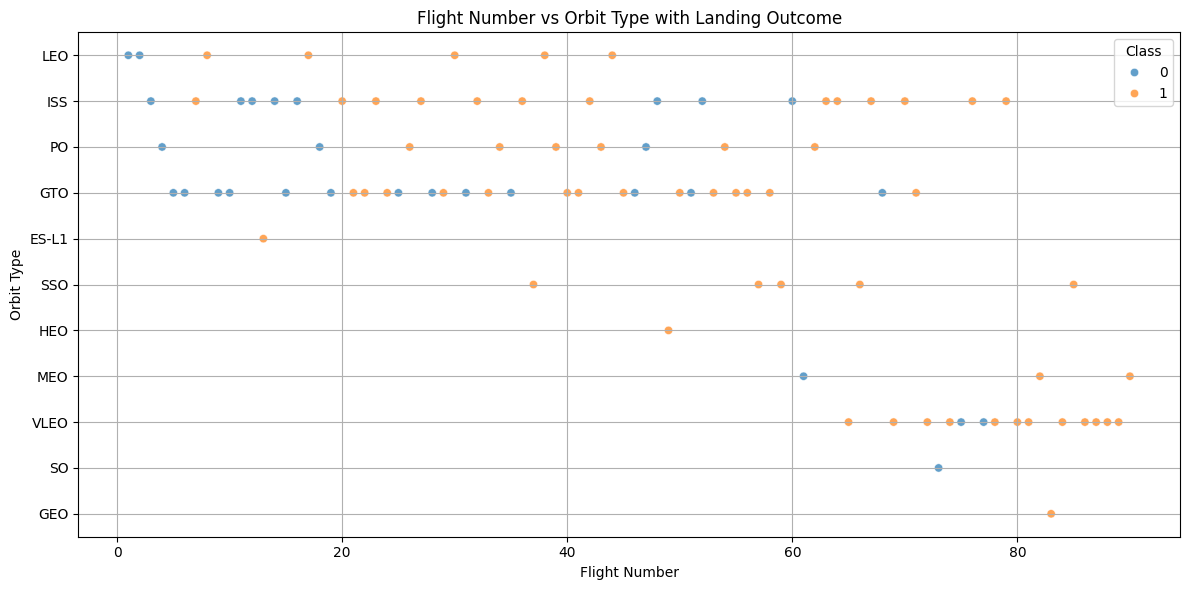

In [9]:
# Create a scatter plot to visualize FlightNumber vs Orbit
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class', alpha=0.7)

plt.title('Flight Number vs Orbit Type with Landing Outcome')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.grid(True)
plt.tight_layout()
plt.show()


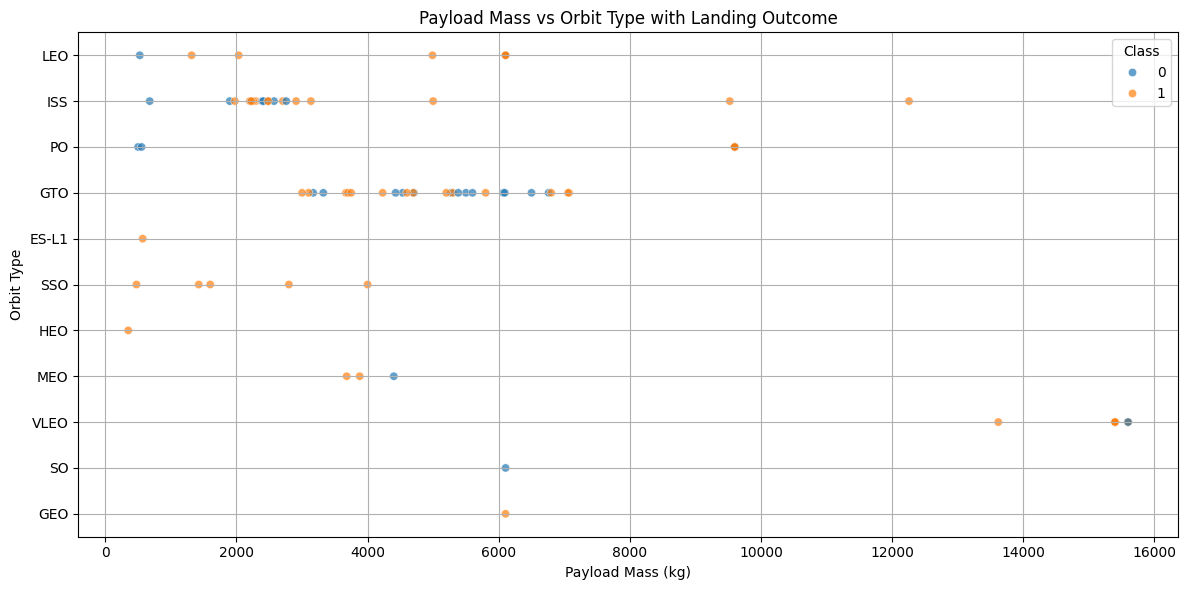

In [10]:
# Create a scatter plot to visualize Payload Mass vs Orbit
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class', alpha=0.7)

plt.title('Payload Mass vs Orbit Type with Landing Outcome')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


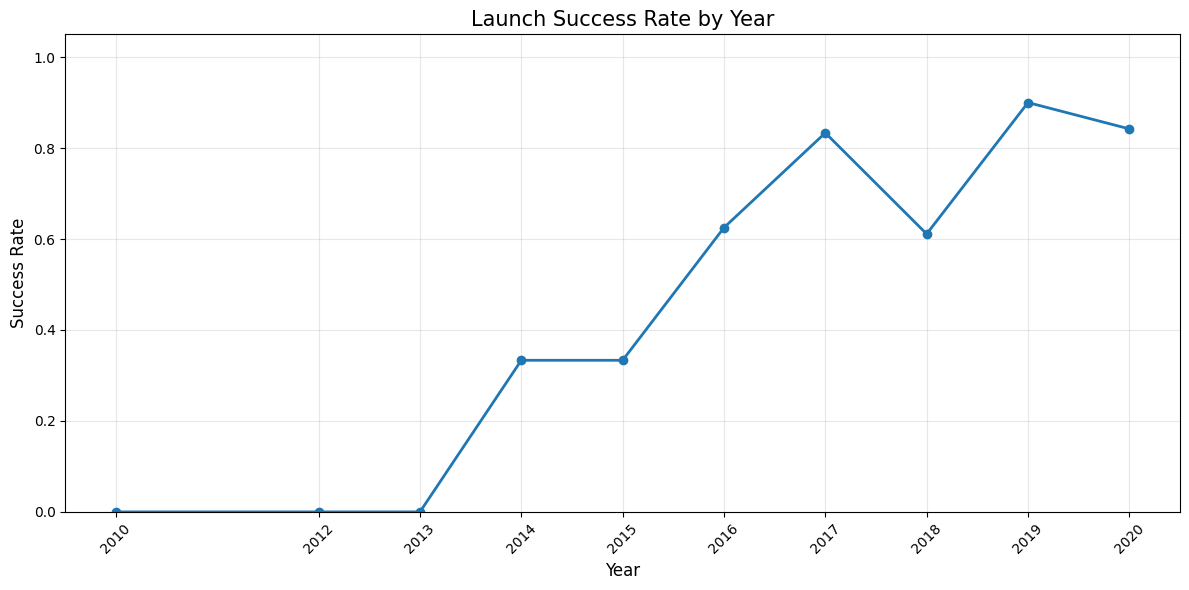

In [12]:
# Group data by year and calculate success rate
yearly_success_rate = df.groupby('Date')['Class'].mean().reset_index()

# Convert 'Date' to numeric for proper ordering
yearly_success_rate['Date'] = yearly_success_rate['Date'].astype(int)

# Sort by year
yearly_success_rate = yearly_success_rate.sort_values('Date')

# Plot the yearly success trend
plt.figure(figsize=(12, 6))
plt.plot(yearly_success_rate['Date'], yearly_success_rate['Class'], marker='o', linestyle='-', linewidth=2)

plt.title('Launch Success Rate by Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.grid(True, alpha=0.3)

# Set y-axis limits between 0 and 1 for better visualization of success rate
plt.ylim(0, 1.05)

# Format x-axis to show all years
plt.xticks(yearly_success_rate['Date'], rotation=45)

plt.tight_layout()
plt.show()

In [13]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [14]:
# Create dummy variables for categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the first few rows
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
# Convert features_one_hot dataframe to float64 data type
features_one_hot = features_one_hot.astype('float64')

# Verify the conversion
print(features_one_hot.dtypes.unique())

[dtype('float64')]


In [16]:
# Save the one-hot encoded features to a CSV file
features_one_hot.to_csv(r"C:\Users\moroi\OneDrive\Desktop\dataset_part_3.csv", index=False)
print("File saved successfully to C:\\Users\\moroi\\OneDrive\\Desktop\\dataset_part_3.csv")

File saved successfully to C:\Users\moroi\OneDrive\Desktop\dataset_part_3.csv
